In [17]:
import matplotlib.pyplot as plt 
#from numpy import *
import pynested_fit as pynf
import os
import glob

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [4]:
# Define the present path
path = os.getcwd()

In [5]:
# List available directories with results
directories = glob.glob('res_*') # Put here the keyword of the directories with the differen results
directories

['res_2gauss_bg', 'res_3gauss_bg', 'res_1gauss_bg', 'res_4gauss_bg']

In [6]:
# Run the analyses in the different directories from python (see 'simple_analysis_visu.ipynb)
# or from the terminal

In [8]:
# Prepare to load the output results files
os.chdir(path)
summary = pynf.Summary()

# Name the labels from the directories names
labels = [dir.split('_')[1] for dir in directories] # This is user dependent
print(labels)

['2gauss', '3gauss', '1gauss', '4gauss']


In [9]:
# Fill the pandas dataframe
df = summary.add_simulations(directories,labels)
df = df.sort_index()

Loading directory  res_2gauss_bg
Current path =  res_2gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'b_g', 'x_1', 'x_2', 'A_1', 'A_2', 's']
Analysis in res_2gauss_bg/
Loading directory  res_3gauss_bg
Current path =  res_3gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'b_g', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's']
Analysis in res_3gauss_bg/
Loading directory  res_1gauss_bg
Current path =  res_1gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'b_g', 'x_1', 'A_1', 's']
Analysis in res_1gauss_bg/
Loading directory  res_4gauss_bg
Current path =  res_4gauss_bg/
Available parameters : ['weight', 'lnlikelihood', 'b_g', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's']
Analysis in res_4gauss_bg/
Parameters  found  ['b_g', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'x_3', 'A_3', 'A_4', 'x_4']

 #### Available input keys ###
clustering
convergence
data
datafiles
filefmt
function
likelihood
search
specstr
version
value
step
minl
maxl
fixed

 #### Avail

In [22]:
# Print (part) of the data frame
# For each parameter, mean, standard deviation, median, max, and credible levels (plus and minus, 68%, 95% and 99%) are available
df[['evidence','evidence_err_est','complexity','mean_x_1','sd_x_1','max_x_1',
    'median_x_1','conf_level_m99_x_1','conf_level_p99_x_1']]

,evidence,evidence_err_est,complexity,mean_x_1,sd_x_1,max_x_1,median_x_1,conf_level_m99_x_1,conf_level_p99_x_1
labels,,,,,,,,,
1gauss,-338.423387,0.090779,3.906101,454.398504,1.726907,454.381295,454.409336,449.898247,458.770631
2gauss,-324.590632,0.116810,6.151746,444.750841,24.608759,464.571737,462.666163,401.693644,467.705724
3gauss,-324.744849,0.128934,10.319087,424.937950,32.940541,422.372273,422.648068,332.222728,473.498155
4gauss,-326.533676,0.137580,10.273234,75.229182,71.790870,213.606701,53.058057,0.261566,242.772332


Text(0, 0.5, 'Evidence (in log)')

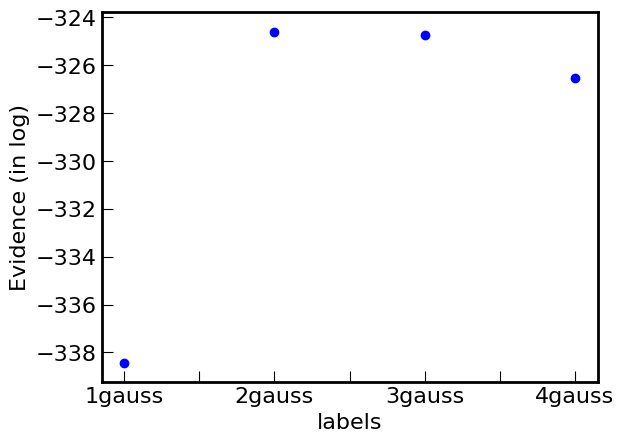

In [18]:
# Plot bayesian evidence values
df['evidence'].plot(yerr=df['evidence_err_est'],fmt='ob',linestyle= 'None')
plt.ylabel('Evidence (in log)')

Text(0, 0.5, 'Bayesian complexity')

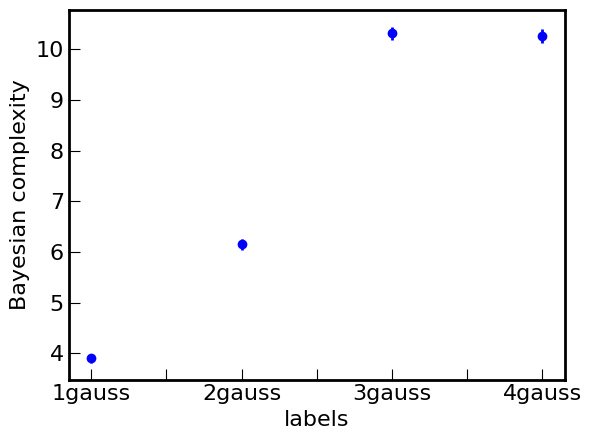

In [21]:
# Plot bayesian complexity values (effective supported parameters)
df['complexity'].plot(yerr=df['evidence_err_est'],fmt='ob',linestyle= 'None')
plt.ylabel('Bayesian complexity')

Text(0, 0.5, 'x01 parameter value')

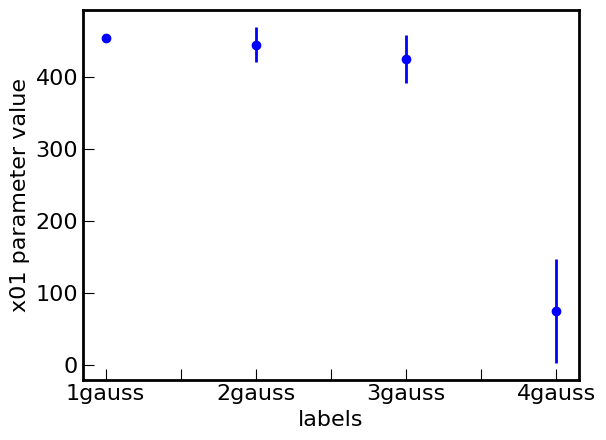

In [24]:
df['mean_x_1'].plot(yerr=df['sd_x_1'],fmt='ob',linestyle= 'None')
plt.ylabel('x01 parameter value')